### Kernel Density Estimation

In [156]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt
from Utilities import plot_settings

In [157]:
url = 'https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt'

In [158]:
from Utilities.utils import read_data

In [172]:
raw, _ = read_data(url)

c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroStatistics\ML\GammaRayBursts\Utilities\utils.py:21: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  raw = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')


In [173]:
f0, f0err = zip(*[(float(a), float(b)) for a, b in zip(raw[9], raw[10]) 
                                           if a != '-999' and b != '-999' 
                                           and float(b)!=0 and float(a)!=0] )

In [174]:
import numpy as np

In [175]:
conversion_factor = 6.2415e8  # keV per erg
fluence = np.array(f0) * conversion_factor
fluence_err = np.array(f0err) * conversion_factor

In [176]:
ratio = fluence_err/fluence

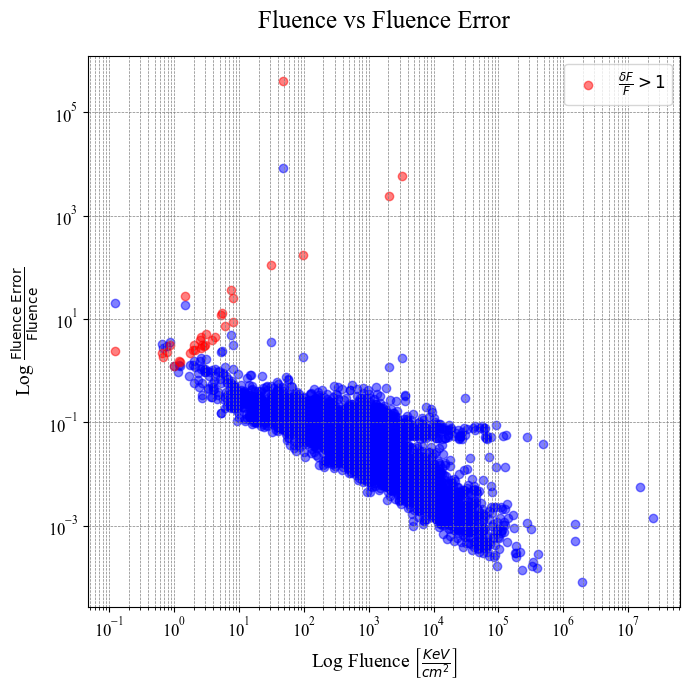

In [177]:
plt.figure(figsize=(7, 7))
plt.scatter(fluence, ratio, marker='o', alpha=0.5, color='b')
plt.scatter(fluence[np.where(ratio > 1)[0]], fluence_err[np.where(ratio > 1)[0]], marker='o', alpha=0.5, color='r'
            , label=r'$\frac{\delta F}{F} > 1$')
plt.loglog()
plt.title('Fluence vs Fluence Error')
plt.ylabel(r'Log $\frac{\text{Fluence Error}}{\text{Fluence}}$')
plt.xlabel(r'Log Fluence $\left[\frac{KeV}{cm^{2}}\right]$')
plt.legend()
plt.grid(True, which='both', ls='--', linewidth=0.5)
plt.show()


In [133]:
fluence = fluence[ratio < 1]
fluence_err = fluence_err[ratio < 1]

In [146]:
logF = np.log10(fluence)
logF_err = 0.434 * (fluence_err / fluence)

Text(0, 0.5, 'Density')

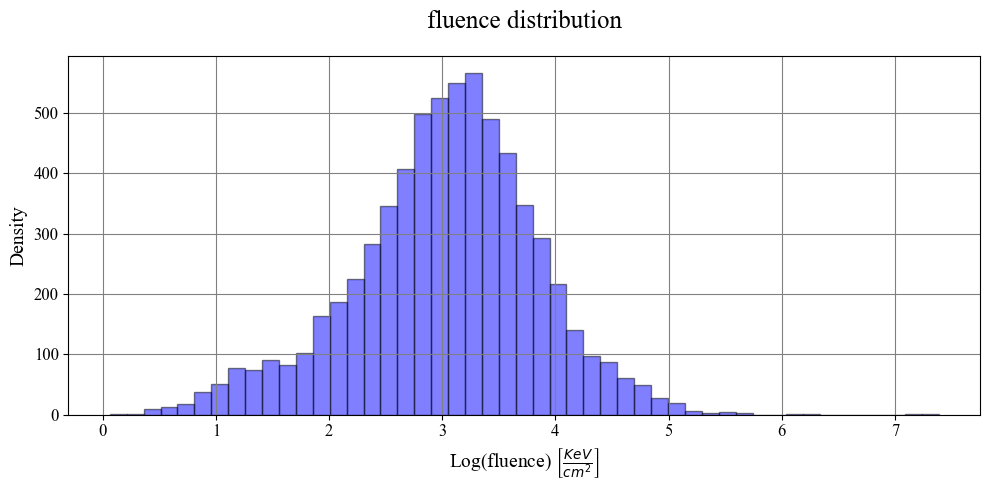

In [138]:
fluencec, fluenceb, _ = plt.hist(np.log10(fluence), bins='scott', density=False, 
                         histtype='barstacked', edgecolor='black', color='blue', alpha=0.5) 
plt.title('fluence distribution')
plt.xlabel(r'Log(fluence) $\left[\frac{KeV}{cm^2}\right]$')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

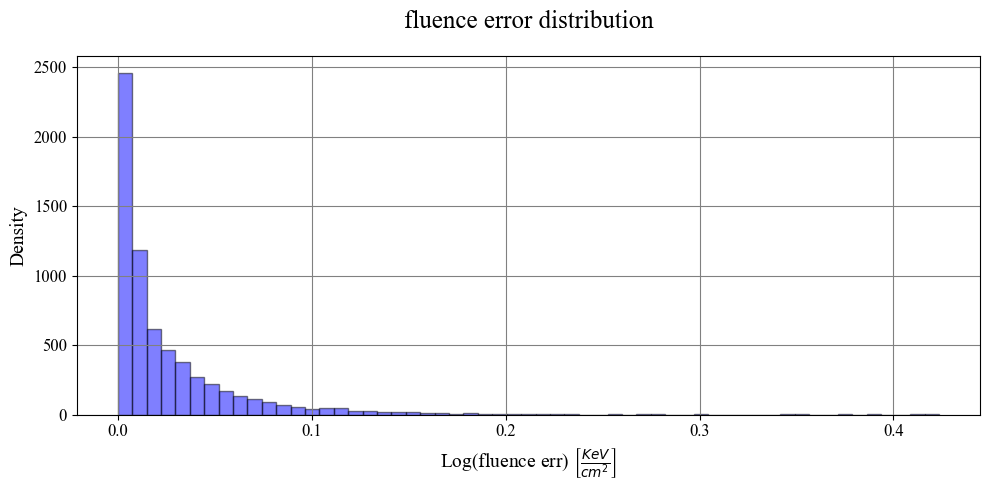

In [148]:
fluence_errc, fluence_errb, _ = plt.hist(logF_err, 'scott', density=False, 
                         histtype='barstacked', edgecolor='black', color='blue', alpha=0.5) 
plt.title('fluence error distribution')
plt.xlabel(r'Log(fluence err) $\left[\frac{KeV}{cm^2}\right]$')
plt.ylabel('Density')

In [179]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [183]:
X = fluencec.reshape((-1,1))
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [185]:
# Fit a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

# Fit the model
gmm.fit(X_train)

# Predict the cluster labels
labels = gmm.predict(X_test)

In [186]:
X_train.shape

(39, 1)

In [ ]:
# Plot the data with the predicted labels
plt.scatter(X_train, X_train, c=labels, cmap='viridis', s=10)
plt.title('GMM Clustering Results')
plt.show()
